In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
df = pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [37]:
df.shape#rows and columns

(51717, 17)

In [38]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [39]:
df.drop(df.columns[[0,1,4,7,13,14]], axis = 1, inplace = True)
df.head()

,name,online_order,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [40]:
df.drop_duplicates(inplace=True)#Duplicates removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51609 non-null  object
 1   online_order                 51609 non-null  object
 2   rate                         43854 non-null  object
 3   votes                        51609 non-null  int64 
 4   location                     51588 non-null  object
 5   rest_type                    51382 non-null  object
 6   dish_liked                   23595 non-null  object
 7   cuisines                     51564 non-null  object
 8   approx_cost(for two people)  51265 non-null  object
 9   listed_in(type)              51609 non-null  object
 10  listed_in(city)              51609 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


In [41]:
df.shape

(51609, 11)

In [42]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [43]:
#We will remove 'NEW', 'nan', '-' and '/5' for better representation
#Defining a function for that

def filterrate(value):#defining a function
    if value == 'NEW' or value == '-':
        return np.nan
    else:
        value = str(value).split('/')#strings will be split at /
        value = value[0]#after splitting, we only want the rating i.e we want value at 0th index
        return float(value)
df['rate'] = df['rate'].apply(filterrate)#applying the function on rate
df['rate'].head()
    
     

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [44]:
df.rate.isnull().sum()#Sum of all the null values in rate
df.rate.fillna(df['rate'].mean(), inplace = True)#Replacing null values with mean of the dataset
df.rate.isnull().sum()

/tmp/ipykernel_33/2614941195.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.rate.fillna(df['rate'].mean(), inplace = True)#Replacing null values with mean of the dataset


0

In [45]:
df.dropna(inplace = True)#Dropping all null values
df.head()

,name,online_order,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [46]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [47]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [48]:
df.drop(['listed_in(city)'],axis = 1)

,name,online_order,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200",Pubs and bars
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000",Pubs and bars
51708,Keys Cafe - Keys Hotel,No,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200",Pubs and bars
51711,Bhagini,No,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars


In [49]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [50]:
def filtercost(value):#defining a function to remove commas
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
    
    
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(filtercost)#applying the function to all
df['approx_cost(for two people)'].head()
    

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: approx_cost(for two people), dtype: float64

In [51]:
df['rest_type'].value_counts()

rest_type
Casual Dining                7387
Quick Bites                  5267
Cafe                         2380
Dessert Parlor               1083
Casual Dining, Bar            986
                             ... 
Fine Dining, Microbrewery       5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: count, Length: 73, dtype: int64

In [52]:
rest_types = df['rest_type'].value_counts(ascending = False)#Storing rest_type in a variable rest_types
rest_types

rest_type
Casual Dining                7387
Quick Bites                  5267
Cafe                         2380
Dessert Parlor               1083
Casual Dining, Bar            986
                             ... 
Fine Dining, Microbrewery       5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: count, Length: 73, dtype: int64

In [53]:
rest_typeslessthan1000 = rest_types[rest_types < 1000] #To cluster all values less than 1000 to 'others'
rest_typeslessthan1000

rest_type
Casual Dining, Bar           986
Delivery                     707
Bar                          358
Bar, Casual Dining           347
Takeaway, Delivery           343
                            ... 
Fine Dining, Microbrewery      5
Club, Casual Dining            4
Dessert Parlor, Kiosk          2
Dhaba                          1
Food Court, Casual Dining      1
Name: count, Length: 69, dtype: int64

In [54]:
def cluster1000(value):
    if value in rest_typeslessthan1000:
        return 'Others'
    else:
        return value
df['rest_type'] = df['rest_type'].apply(cluster1000)
df['rest_type'].value_counts()


rest_type
Casual Dining     7387
Others            7276
Quick Bites       5267
Cafe              2380
Dessert Parlor    1083
Name: count, dtype: int64

In [55]:
df['location'].value_counts()


location
Koramangala 5th Block    1799
BTM                      1486
Indiranagar              1365
HSR                      1176
Jayanagar                1077
                         ... 
Yelahanka                   2
Kanakapura Road             2
West Bangalore              2
Rajarajeshwari Nagar        2
KR Puram                    1
Name: count, Length: 88, dtype: int64

In [56]:
locations = df['location'].value_counts(ascending = False)#Storing location in a variable locations
locations

location
Koramangala 5th Block    1799
BTM                      1486
Indiranagar              1365
HSR                      1176
Jayanagar                1077
                         ... 
Yelahanka                   2
Kanakapura Road             2
West Bangalore              2
Rajarajeshwari Nagar        2
KR Puram                    1
Name: count, Length: 88, dtype: int64

In [57]:
locationslessthan500 = locations[locations < 100] #To cluster all values less than 500 to 'others'
locationslessthan500

location
Infantry Road                    94
Race Course Road                 75
Basaveshwara Nagar               71
Seshadripuram                    69
Shivajinagar                     69
Nagawara                         64
Ejipura                          58
Kumaraswamy Layout               56
Kaggadasapura                    48
Koramangala 2nd Block            45
Thippasandra                     43
ITPL Main Road, Whitefield       42
HBR Layout                       42
Wilson Garden                    41
Sadashiv Nagar                   39
Hennur                           34
Bommanahalli                     28
Majestic                         27
Varthur Main Road, Whitefield    27
Hosur Road                       24
Yeshwantpur                      24
Langford Town                    22
RT Nagar                         22
Sahakara Nagar                   20
South Bangalore                  19
Sankey Road                      17
Sanjay Nagar                     17
Koramangala        

In [58]:
def cluster500(value):
    if value in locationslessthan500:
        return 'Others'
    else:
        return value
df['location'] = df['location'].apply(cluster500)
df['location'].value_counts()


location
Koramangala 5th Block    1799
BTM                      1486
Indiranagar              1365
Others                   1255
HSR                      1176
Jayanagar                1077
JP Nagar                 1029
Whitefield                835
Koramangala 7th Block     742
Koramangala 6th Block     726
Marathahalli              680
Koramangala 4th Block     664
MG Road                   601
Brigade Road              567
Church Street             509
Bannerghatta Road         499
Ulsoor                    476
Bellandur                 474
Kalyan Nagar              468
Koramangala 1st Block     467
Sarjapur Road             455
Lavelle Road              441
Residency Road            439
Banashankari              390
Malleshwaram              372
Richmond Road             351
Cunningham Road           332
Electronic City           326
Brookefield               307
New BEL Road              306
St. Marks Road            304
Frazer Town               293
Basavanagudi              286
K

In [59]:
df['cuisines'].value_counts()
diff_cuisines = df['cuisines'].value_counts(ascending = False)
diff_cuisines


cuisines
North Indian                                 1160
North Indian, Chinese                         778
South Indian                                  367
Cafe                                          285
South Indian, North Indian, Chinese           233
                                             ... 
Chinese, Thai, Seafood, Malaysian               1
North Indian, Chinese, Arabian, Kebab           1
Andhra, North Indian, Biryani, Seafood          1
Biryani, North Indian, Mughlai, Fast Food       1
Thai, Chinese, Momos                            1
Name: count, Length: 1691, dtype: int64

In [62]:
cuisineslessthan50 = diff_cuisines[diff_cuisines < 50] #To cluster all values less than 100 to 'others'


In [63]:
cuisineslessthan50

cuisines
Continental, Chinese                         49
North Indian, Chinese, South Indian          48
Bengali, Seafood                             47
Tea, Beverages, Fast Food                    46
Beverages                                    46
                                             ..
Chinese, Thai, Seafood, Malaysian             1
North Indian, Chinese, Arabian, Kebab         1
Andhra, North Indian, Biryani, Seafood        1
Biryani, North Indian, Mughlai, Fast Food     1
Thai, Chinese, Momos                          1
Name: count, Length: 1622, dtype: int64

In [64]:
def cluster50(value):
    if value in cuisineslessthan50:
        return 'Others'
    else:
        return value
df['cuisines'] = df['cuisines'].apply(cluster50)
df['cuisines'].value_counts()


cuisines
Others                                14616
North Indian                           1160
North Indian, Chinese                   778
South Indian                            367
Cafe                                    285
                                      ...  
Andhra, Biryani                          53
North Indian, Chinese, Continental       52
Cafe, Continental, Burger                51
North Indian, Fast Food                  50
North Indian, Mughlai, Chinese           50
Name: count, Length: 70, dtype: int64

In [65]:
df.head()

,name,online_order,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",Others,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,3.8,918,Banashankari,Others,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",Others,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",Others,600.0,Buffet,Banashankari


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'Jayanagar'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Bannerghatta Road'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Koramangala 5th Block'),
  Text(8, 0, 'Shanti Nagar'),
  Text(9, 0, 'Richmond Road'),
  Text(10, 0, 'Bellandur'),
  Text(11, 0, 'Sarjapur Road'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'HSR'),
  Text(14, 0, 'Old Airport Road'),
  Text(15, 0, 'Indiranagar'),
  Text(16, 0, 'Koramangala 1st Block'),
  Text(17, 0, 'MG Road'),
  Text(18, 0, 'Brigade Road'),
  Text(19, 0, 'Lavelle Road'),
  Text(20, 0, 'Church Street'),
  Text(21, 0, 'Ulsoor'),
  Text(22, 0, 'Residency Road'),
  Text(23, 0, 'St. Marks Road'),
  Text(24, 0, 'Cunningham Road'),
  Text(25, 0, 'Domlur'),
  Text(26, 0, 'Ko

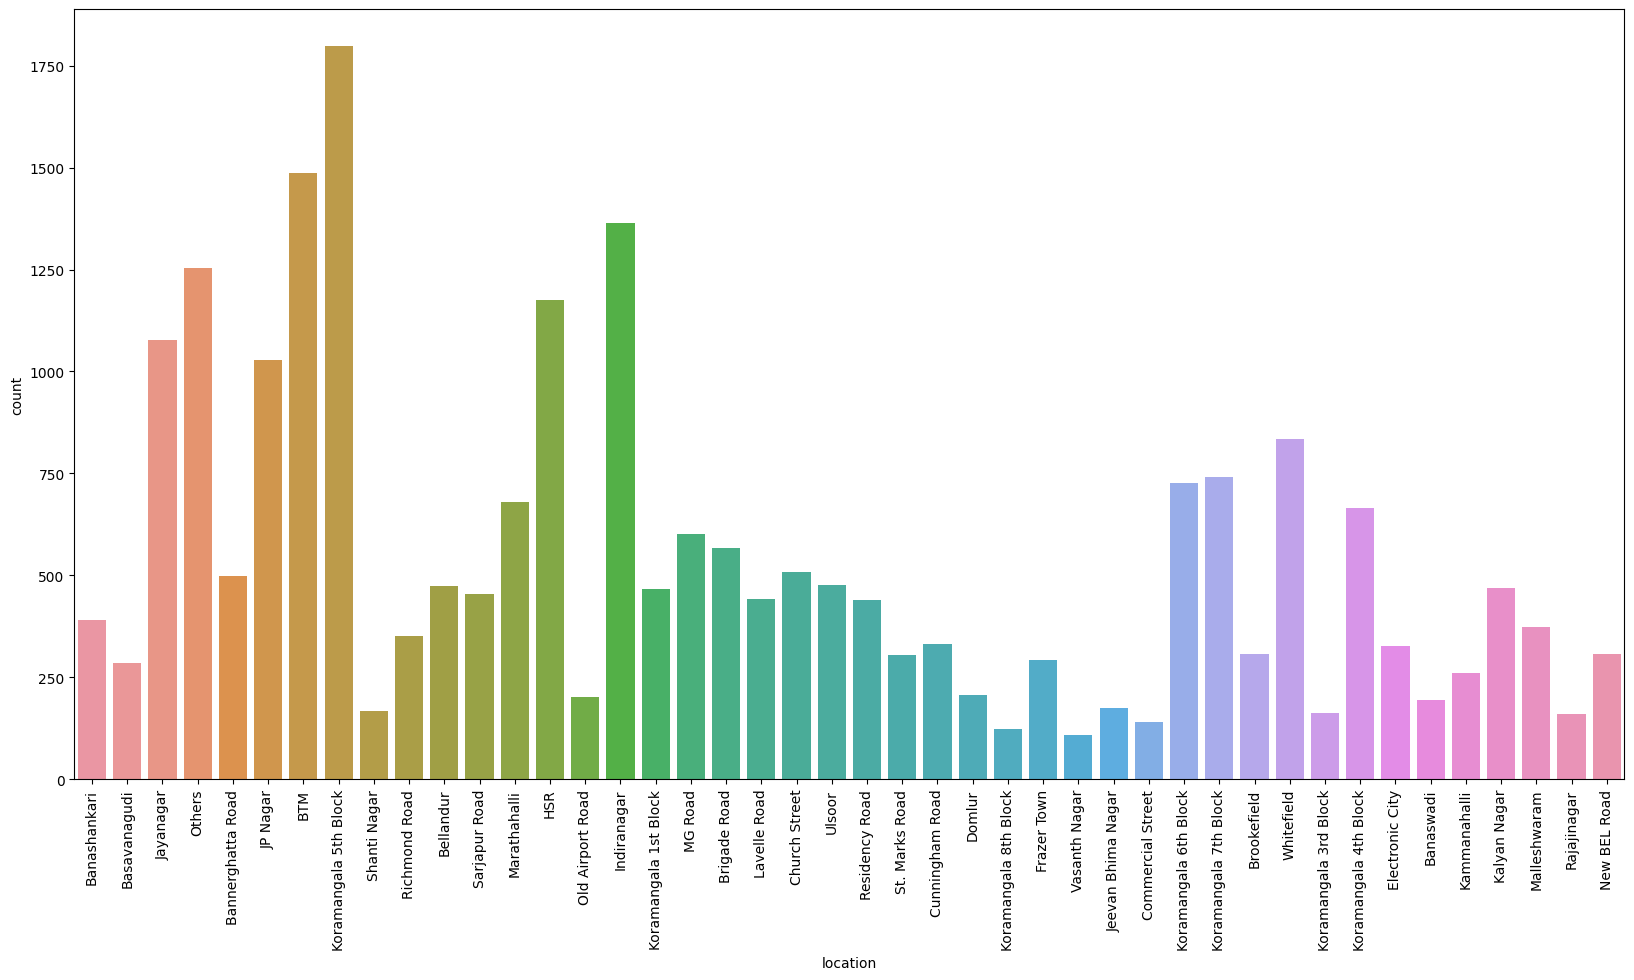

In [66]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x ='location', data = df)
plt.xticks(rotation = 90)

<Axes: xlabel='online_order', ylabel='count'>

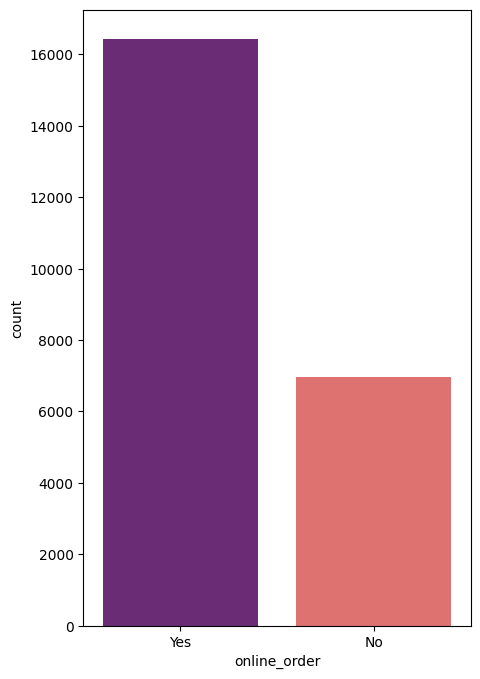

In [67]:
plt.figure(figsize = (5,8))
sns.countplot(x = 'online_order', data = df, palette = 'magma' )

<Axes: xlabel='online_order', ylabel='rate'>

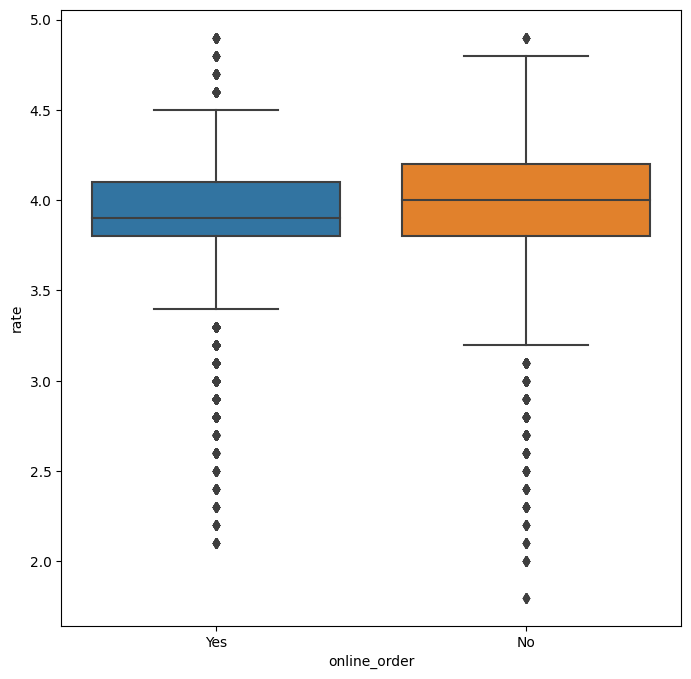

In [68]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'online_order', y = 'rate', data = df )

<Axes: xlabel='rest_type', ylabel='rate'>

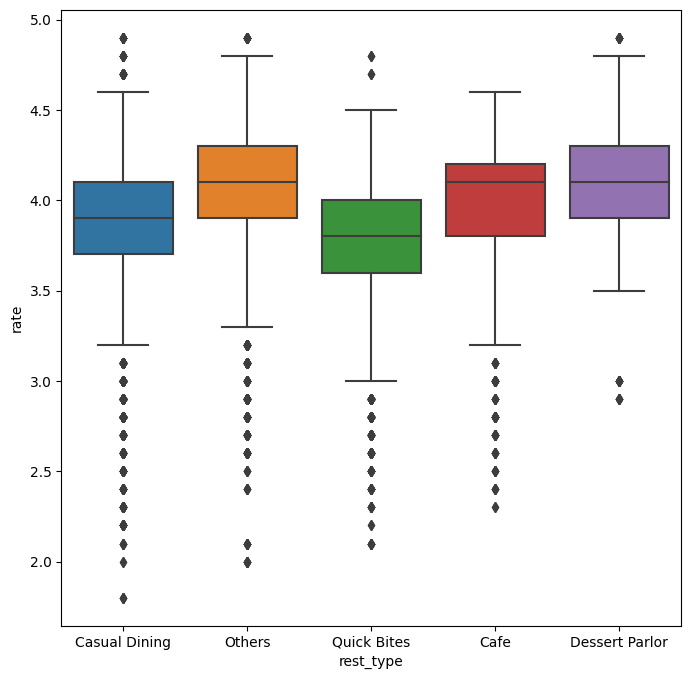

In [69]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'rest_type', y = 'rate', data = df )

In [70]:
# Online order facility depending on locations
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1,values = None, index = ['location'], columns = ['online_order'], fill_value = 0,aggfunc = np.sum)
df1

/tmp/ipykernel_33/932629376.py:5: FutureWarning: The provided callable <function sum at 0x7a291c4676d0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(df1,values = None, index = ['location'], columns = ['online_order'], fill_value = 0,aggfunc = np.sum)


name      
online_order            No   Yes
location                        
BTM                    274  1212
Banashankari           103   287
Banaswadi               40   155
Bannerghatta Road      114   385
Basavanagudi            84   202
Bellandur              118   356
Brigade Road           224   343
Brookefield             61   246
Church Street          195   314
Commercial Street       65    76
Cunningham Road         62   270
Domlur                  92   114
Electronic City         98   228
Frazer Town             82   211
HSR                    161  1015
Indiranagar            403   962
JP Nagar               315   714
Jayanagar              220   857
Jeevan Bhima Nagar      29   145
Kalyan Nagar           127   341
Kammanahalli            55   205
Koramangala 1st Block   57   410
Koramangala 3rd Block   48   113
Koramangala 4th Block  262   402
Koramangala 5th Block  564  1235
Koramangala 6th Block  239   487
Koramangala 7th Block  216   526
Koramangala 8th Block   24   100
Lavelle Road           253   188
MG Road                327   274
Malleshwaram           132   240
Marathahalli           161   519
New BEL Road            64   242
Old Airport Road        76   126
Others                 335   920
Rajajinagar             46   113
Residency Road         265   174
Richmond Road          202   149
Sarjapur Road          108   347
Shanti Nagar            45   121
St. Marks Road         137   167
Ulsoor                 170   306
Vasanth Nagar           37    71
Whitefield             267   568

<Axes: xlabel='location'>

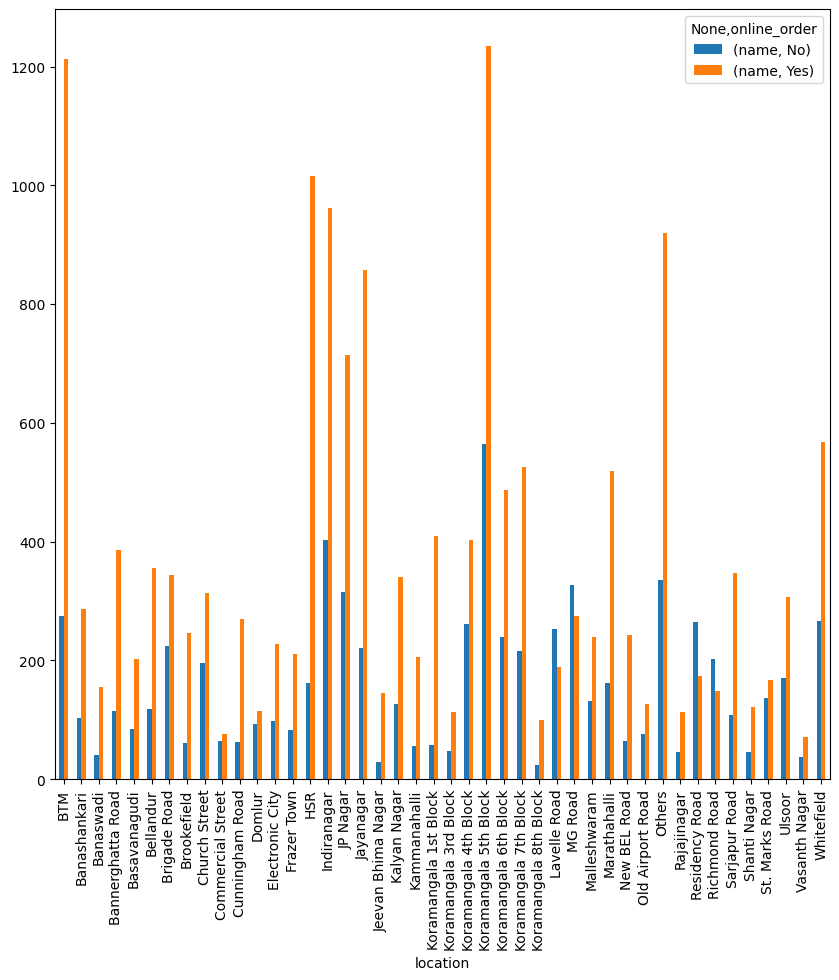

In [71]:
df1.plot(kind = 'bar', figsize = (10,10))

<Axes: xlabel='listed_in(type)', ylabel='rate'>

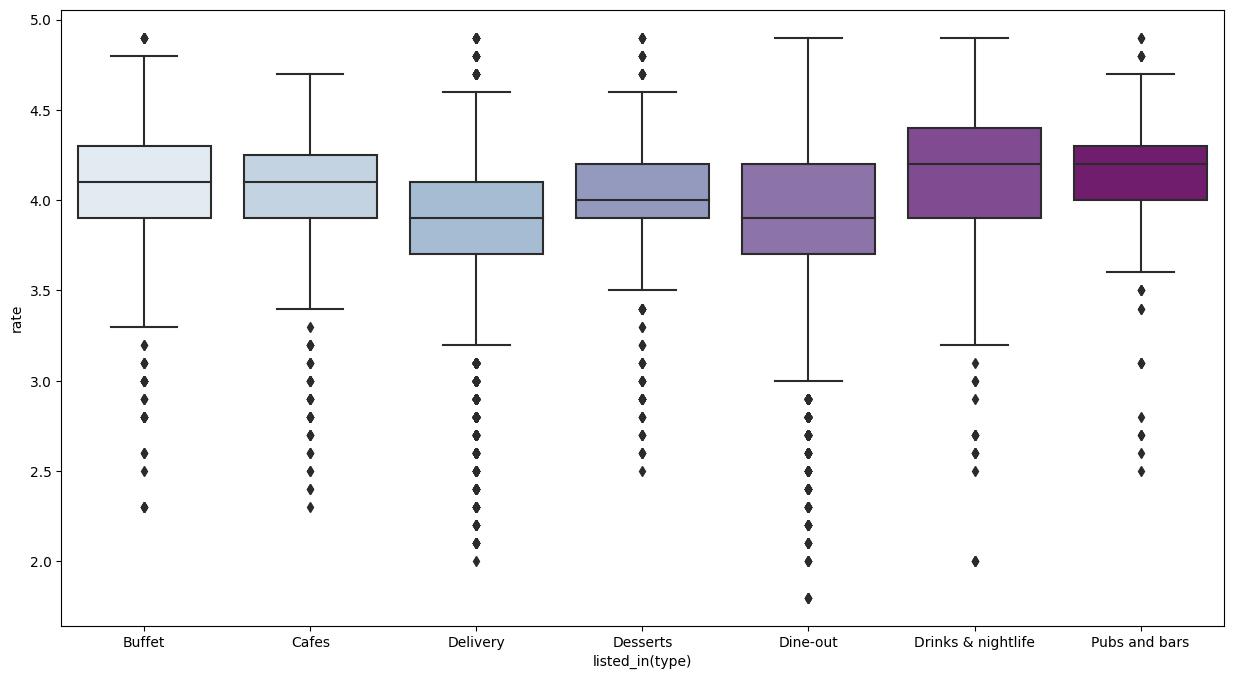

In [72]:
#Type of restaurants vs rates
plt.figure(figsize = (15,8))
sns.boxplot(x = 'listed_in(type)', y = 'rate', data = df, palette = 'BuPu')

In [73]:
#Grouping of Restaurants locationwise into barplot
df2= df.groupby(['location','listed_in(type)'])['name'].count()
df2.to_csv('location_type.csv')
df2 = pd.read_csv('location_type.csv')
df2 = pd.pivot_table(df2,values = None, index = ['location'], columns = ['listed_in(type)'], fill_value = 0,aggfunc = np.sum)
df2



/tmp/ipykernel_33/731463571.py:5: FutureWarning: The provided callable <function sum at 0x7a291c4676d0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2,values = None, index = ['location'], columns = ['listed_in(type)'], fill_value = 0,aggfunc = np.sum)


name                                   \
listed_in(type)       Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       18    36      902       54      461   
Banashankari               7    24      191       19      141   
Banaswadi                  0     8       93        8       82   
Bannerghatta Road          8    19      252       28      182   
Basavanagudi               4    10      136       15      116   
Bellandur                 26    11      217       26      167   
Brigade Road              20    20      200       42      213   
Brookefield                6    15      150       14      118   
Church Street             19    41      176       25      197   
Commercial Street          0     0       47       24       70   
Cunningham Road           23    23      144       17      110   
Domlur                    14     4       98       11       61   
Electronic City           17    11      125       15      134   
Frazer Town                1     7      184       21       77   
HSR                       17    36      765       55      275   
Indiranagar               36    84      678       91      358   
JP Nagar                  34    51      470       63      360   
Jayanagar                 25    57      586       75      322   
Jeevan Bhima Nagar         0     2       92        4       76   
Kalyan Nagar               9    27      193       33      188   
Kammanahalli               2    10      131        9      106   
Koramangala 1st Block      3    18      269       17      148   
Koramangala 3rd Block     19    20       44        9       56   
Koramangala 4th Block     16    44      267       41      216   
Koramangala 5th Block     65   124      715      157      601   
Koramangala 6th Block     18    36      313       44      261   
Koramangala 7th Block     25    32      280       73      291   
Koramangala 8th Block      0    10       73       12       28   
Lavelle Road              30    22       99       29      176   
MG Road                   44    43      143       29      258   
Malleshwaram              11    16      119       27      165   
Marathahalli              27     8      354       18      250   
New BEL Road               4    20      159       14       94   
Old Airport Road          10     2       87       11       73   
Others                    46    37      699       46      377   
Rajajinagar               10     0       70        6       62   
Residency Road            20    20      110       42      190   
Richmond Road             54    10       86       25      164   
Sarjapur Road             25    11      208       25      146   
Shanti Nagar               5     4       78        8       60   
St. Marks Road             5    10      101       10      120   
Ulsoor                    16    43      169       27      184   
Vasanth Nagar              1    13       55        7       27   
Whitefield                21    28      366       41      321   

                                                        
listed_in(type)       Drinks & nightlife Pubs and bars  
location                                                
BTM                                    9             6  
Banashankari                           8             0  
Banaswadi                              4             0  
Bannerghatta Road                      8             2  
Basavanagudi                           5             0  
Bellandur                             15            12  
Brigade Road                          52            20  
Brookefield                            4             0  
Church Street                         31            20  
Commercial Street                      0             0  
Cunningham Road                       11             4  
Domlur                                10             8  
Electronic City                       12            12  
Frazer Town                            1             2  

<Axes: xlabel='location'>

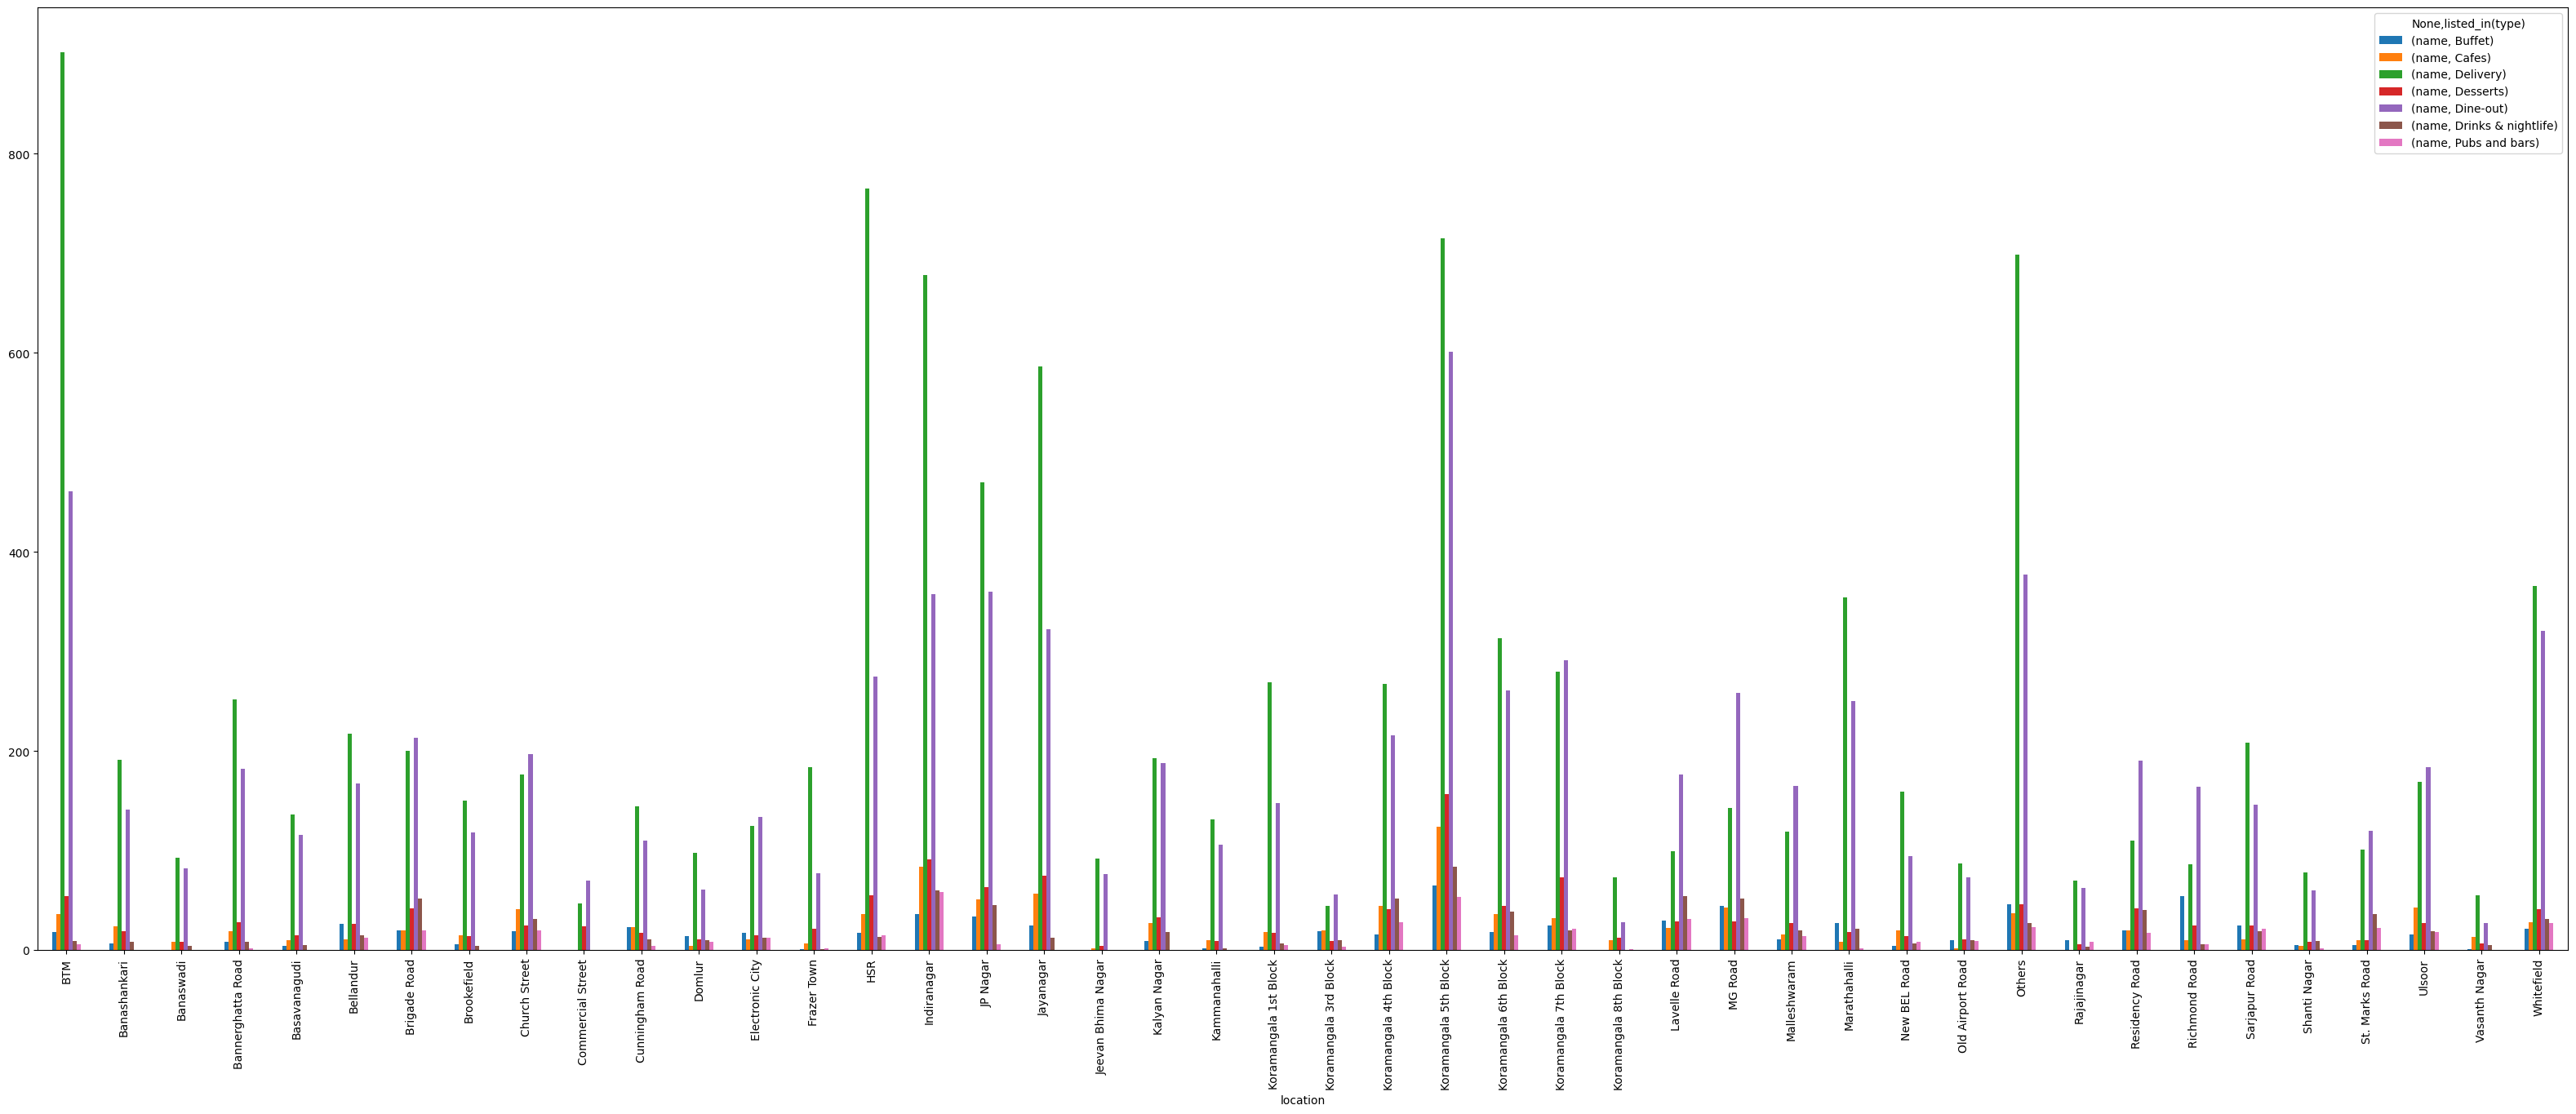

In [74]:
df2.plot(kind = 'bar', figsize = (40,15))

In [75]:
#Grouping based on votes and location 
df3= df[['location','votes']]
df3.drop_duplicates()
df4 = df3.groupby(['location'])['votes'].sum()
df4 = df4.to_frame()
df4 = df4.sort_values('votes', ascending = False)
df4.head()



,votes
location,
Koramangala 5th Block,2203218
Indiranagar,1155387
Koramangala 4th Block,680907
Church Street,589803
JP Nagar,567176


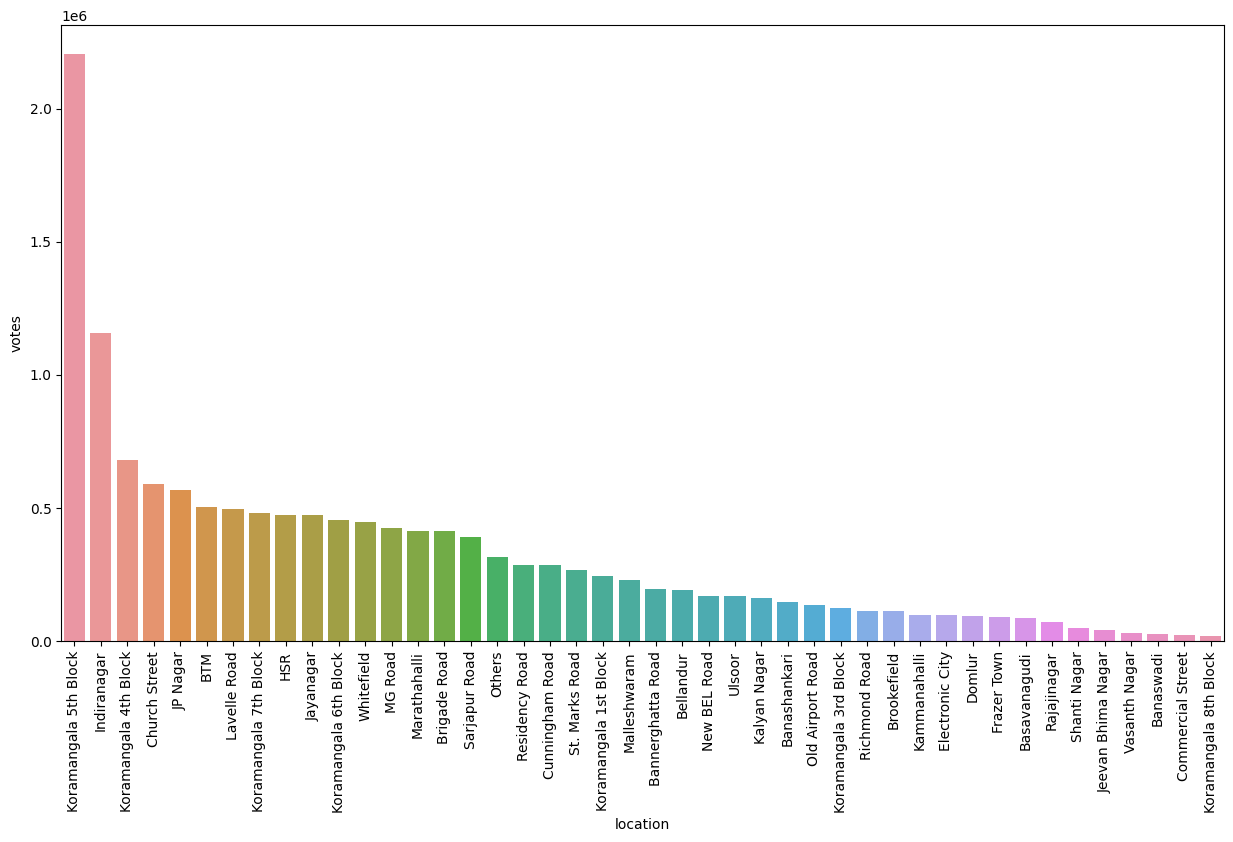

In [76]:
plt.figure(figsize=(15, 8))
sns.barplot(x=df4.index, y=df4['votes'])
plt.xticks(rotation=90)
plt.show()
